📘 **Project Notebook (Google Colab):**

**This notebook contains the complete implementation of the AgriYield Predictor project, including data preprocessing, EDA, feature engineering, and model development.**

**[AgriYield Predictor project ](https://colab.research.google.com/drive/1L7F6XQ0mKSa5mDKJH1xOkQ-hy8BoDVSW?usp=sharing)**

# AgriYield Predictor – Introduction & Project Scope

**`Title:` AgriYield Predictor: Forecasting Crop Yield Using Environmental and Soil Data**


**`Objective:`**

To develop a machine learning system that predicts crop yield based on tabular environmental
and soil parameters such as rainfall, temperature, humidity, soil type, and nutrient content. The
project aims to assist farmers and agricultural planners in optimizing crop production.

**`Outcomes:`**

• Understand preprocessing and feature engineering on tabular agricultural datasets.

• Learn to train and evaluate regression models for yield prediction.

• Gain experience in model performance comparison and explainability (e.g., SHAP
values).

• Deliver a functional prototype with yield predictions based on user input or uploaded
data.

**`Dataset:`**

• FAO Crop Production Dataset: Contains crop yield data from different regions.




Link: https://www.fao.org/faostat/en/#data/QCL

• Kaggle or Indian Government Open Agriculture Data Portal: Includes environmental
and soil data by region.

Link1: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

Link2: https://www.data.gov.in/sector/agriculture

• Weather and Soil Data from publicly available sources like Kaggle, NOAA, or Open
Weather Map historical APIs.

Link: https://www.kaggle.com/datasets/sobhanmoosavi/us-weather-events

Link: https://www.ncei.noaa.gov/

**`Architectural diagram: `**


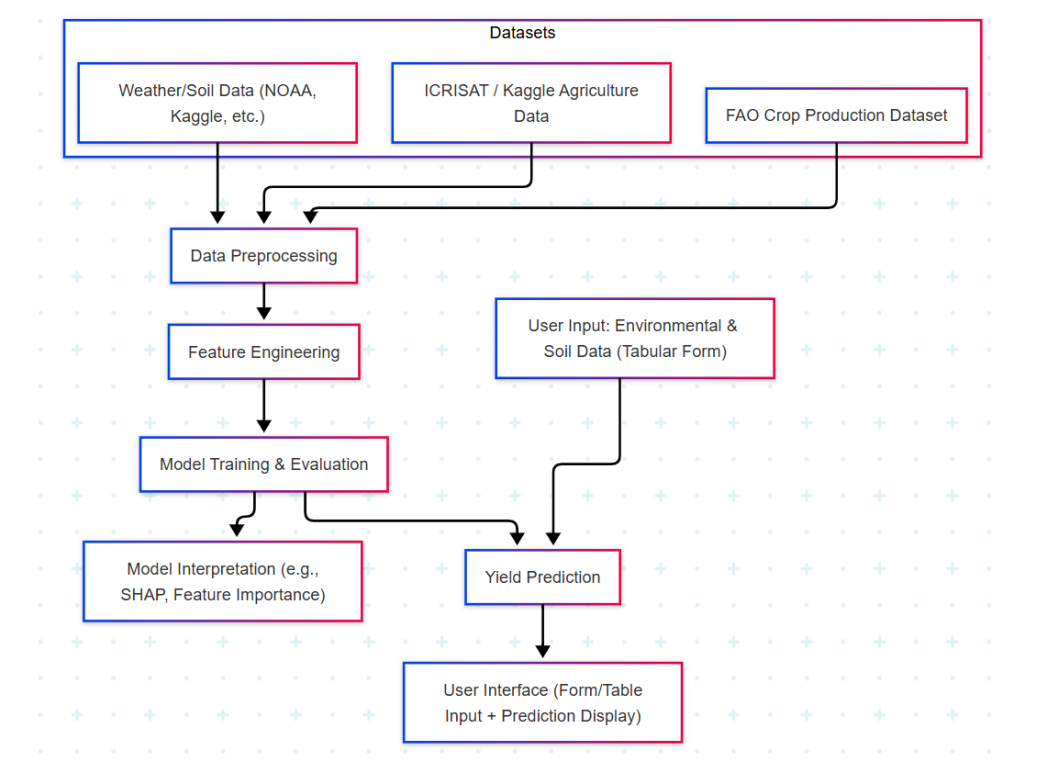



**`Modules to be Implemented:`**

1. Data Collection & Preprocessing
2. Exploratory Data Analysis (EDA) & Feature Engineering
3. Machine Learning Model Development
4. UI for Data Input and Prediction Output
5. Evaluation and Final Deployment

**`Tools & Tech Stack`**

To implement the AgriYield Predictor project effectively, consider the following tools and
technologies:



> Programming Language


• Python: Widely used for data analysis and machine learning tasks.

> Libraries & Frameworks

• Data Handling: pandas, numpy

• Visualization: matplotlib, seaborn, plotly

• Machine Learning: scikit-learn, xgboost, lightgbm

• Model Interpretation: SHAP, eli5

• Web Framework: Flask or Django for developing the web interface

• Frontend: HTML, CSS, JavaScript, possibly with Bootstrap for responsive design

> Development Tools

• IDE: Jupyter Notebook, VS Code

• Version Control: Git with platforms like GitHub or GitLab

• Deployment: Heroku, AWS, or Google Cloud Platform for hosting the application

# Machine Learning Pipeline – Step-by-Step Workflow

Step 1: Collection of Datasets

Collect datasets from FAO, Kaggle, NOAA, ICRISAT, etc.

---



Step 2: Exploratory Data Analysis (EDA)
* Combining Datasets
* Checking nulls




* Checking duplicates

* Checking outliers

* Checking distributions

* Checking bias




---


Step 3: Feature Engineering

* Extracting useful columns
* (Correlation matrix,...)
* Converting categorical → numerical

* Standardizing / Normalizing data

* (-1 to 1 or 0 to 1)... Standard Scaler / Min Max Scaler


---


Step 4: Splitting Dataset into Train & Test

`(x_train, x_test, y_train, y_test)`






---


Step 5: Selecting Suitable Model

Choose best ML algorithms (LR, DT, RF, XGBoost, etc.)


---


Step 6: Model Training(x_train, x_test)

Train the selected model using training data.


---


Step 7: Predicting Results

Generate predictions using test data:
`y_pred = model.predict(x_test)`


---


Step 8: Evaluating Model Accuracy(Y-pred,y_test)

Compare predictions vs actual:

* R² Score

* MAE

* RMSE


---


Step 9: Hyperparameter Tuning

Use GridSearchCV / RandomizedSearchCV to improve model.


---


Step 10: Retraining the Model with data(x_train,y_train)

Train model again using best parameters.


---


Step 11: Predicting Results (x_test)...y_pred

Run predictions again after tuning.


---


Step 12: Evaluating Model Accuracy (Y-pred,y_test)

Check improved metrics using tuned model.


---


Step 13: Deployment

Deploy the final model using Flask / Django / Streamlit and host it on cloud.

# Milestone 1: Week 1 & 2 - Requirements & Dataset Preparation

• Define project scope and success metrics.

• Collect and clean crop yield, weather, and soil datasets.

• Merge datasets based on geolocation and crop type.

• Handle missing values, normalize/standardize features.

In [ ]:
import pandas as pd
fao = pd.read_csv("/content/FAOSTAT_data_en_12-8-2025.csv")
crop = pd.read_csv("/content/Crop_recommendation.csv")

## FAO Dataset Details

In [ ]:
fao

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,ha,3.444340e+05,A,Official figure,NaN
1,QCL,Crops and livestock products,356,India,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,kg/ha,4.840000e+02,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,t,1.666920e+05,A,Official figure,NaN
3,QCL,Crops and livestock products,356,India,5312,Area harvested,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,ha,5.692710e+05,A,Official figure,NaN
4,QCL,Crops and livestock products,356,India,5412,Yield,1654.0,"Anise, badian, coriander, cumin, caraway, fenn...",2001,2001,kg/ha,4.303000e+02,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,QCL,Crops and livestock products,356,India,5412,Yield,111.0,Wheat,2022,2022,kg/ha,3.537300e+03,A,Official figure,NaN
5936,QCL,Crops and livestock products,356,India,5510,Production,111.0,Wheat,2022,2022,t,1.077421e+08,A,Official figure,NaN
5937,QCL,Crops and livestock products,356,India,5312,Area harvested,111.0,Wheat,2023,2023,ha,3.140072e+07,A,Official figure,NaN
5938,QCL,Crops and livestock products,356,India,5412,Yield,111.0,Wheat,2023,2023,kg/ha,3.520700e+03,A,Official figure,NaN


In [ ]:
fao['Item'].unique()

array(['Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw',
       'Apples', 'Apricots', 'Areca nuts', 'Bananas', 'Barley',
       'Beans, dry', 'Cabbages', 'Cantaloupes and other melons',
       'Carrots and turnips', 'Cashew nuts, in shell', 'Cassava, fresh',
       'Castor oil seeds', 'Cauliflowers and broccoli', 'Cherries',
       'Chick peas, dry',
       'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw',
       'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
       'Cocoa beans', 'Coconuts, in shell', 'Coffee, green', 'Coir, raw',
       'Cucumbers and gherkins', 'Eggplants (aubergines)', 'Figs',
       'Ginger, raw', 'Grapes', 'Green garlic',
       'Groundnuts, excluding shelled', 'Jute, raw or retted',
       'Kenaf, and other textile bast fibres, raw or retted',
       'Lemons and limes', 'Lentils, dry', 'Lettuce and chicory',
       'Linseed', 'Maize (corn)', 'Mangoes, guavas and mangosteens',
       'Millet', 'Mushrooms a

In [ ]:
len(fao['Item'].unique())

85

In [ ]:
fao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5940 entries, 0 to 5939
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       5940 non-null   object 
 1   Domain            5940 non-null   object 
 2   Area Code (M49)   5940 non-null   int64  
 3   Area              5940 non-null   object 
 4   Element Code      5940 non-null   int64  
 5   Element           5940 non-null   object 
 6   Item Code (CPC)   5940 non-null   float64
 7   Item              5940 non-null   object 
 8   Year Code         5940 non-null   int64  
 9   Year              5940 non-null   int64  
 10  Unit              5940 non-null   object 
 11  Value             5727 non-null   float64
 12  Flag              5940 non-null   object 
 13  Flag Description  5940 non-null   object 
 14  Note              115 non-null    object 
dtypes: float64(2), int64(4), object(9)
memory usage: 696.2+ KB


## FAO Explode Operation


In [ ]:
fao['Item'] = fao['Item'].str.split(',')
fao = fao.explode('Item')
fao['Item'] = fao['Item'].str.strip().str.lower()
fao['Item'] = fao['Item'].apply(lambda x: x[:-1] if x.endswith('s') else x)

In [ ]:
fao = fao[fao['Element'] == 'Production']
fao.shape

(3144, 15)

In [ ]:
fao

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,anise,2000,2000,t,1.666920e+05,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,badian,2000,2000,t,1.666920e+05,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,coriander,2000,2000,t,1.666920e+05,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,cumin,2000,2000,t,1.666920e+05,A,Official figure,NaN
2,QCL,Crops and livestock products,356,India,5510,Production,1654.0,caraway,2000,2000,t,1.666920e+05,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5927,QCL,Crops and livestock products,356,India,5510,Production,111.0,wheat,2019,2019,t,1.035962e+08,A,Official figure,NaN
5930,QCL,Crops and livestock products,356,India,5510,Production,111.0,wheat,2020,2020,t,1.078605e+08,A,Official figure,NaN
5933,QCL,Crops and livestock products,356,India,5510,Production,111.0,wheat,2021,2021,t,1.095865e+08,A,Official figure,NaN
5936,QCL,Crops and livestock products,356,India,5510,Production,111.0,wheat,2022,2022,t,1.077421e+08,A,Official figure,NaN


In [ ]:
l1 = []
for i in fao['Item']:
    if i not in l1:
        l1.append(i)

l1.sort()
l1

['and other textile bast fibre',
 'anise',
 'apple',
 'apricot',
 'areca nut',
 'badian',
 'banana',
 'barley',
 'bean',
 'cabbage',
 'cantaloupes and other melon',
 'caraway',
 'cardamom',
 'carrots and turnip',
 'cashew nut',
 'cassava',
 'castor oil seed',
 'cauliflowers and broccoli',
 'cherrie',
 'chick pea',
 'chillies and pepper',
 'clementine',
 'cocoa bean',
 'coconut',
 'coffee',
 'coir',
 'coriander',
 'cucumbers and gherkin',
 'cumin',
 'dry',
 'dry (capsicum spp.',
 'dry (excluding dehydrated)',
 'eggplants (aubergines)',
 'excluding shelled',
 'fennel and juniper berrie',
 'fig',
 'fresh',
 'fresh n.e.c.',
 'ginger',
 'grape',
 'green',
 'green (capsicum spp. and pimenta spp.)',
 'green garlic',
 'groundnut',
 'guavas and mangosteen',
 'in shell',
 'jute',
 'kenaf',
 'lemons and lime',
 'lentil',
 'lettuce and chicory',
 'linseed',
 'mace',
 'maize (corn)',
 'mandarin',
 'mangoe',
 'millet',
 'mushrooms and truffle',
 'n.e.c.',
 'natural rubber in primary form',
 'nutmeg'

In [ ]:
len(l1)

110

## Crop Dataset Details


In [ ]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
len(crop['label'].unique())

22

In [ ]:
crop['label'] = crop['label'].str.strip().str.lower()
crop['label'] = crop['label'].apply(lambda x: x[:-1] if x.endswith('s') else x)

In [ ]:
l2 = []
for i in crop['label']:
    if i not in l2:
        l2.append(i)

l2.sort()
l2

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grape',
 'jute',
 'kidneybean',
 'lentil',
 'maize',
 'mango',
 'mothbean',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpea',
 'pomegranate',
 'rice',
 'watermelon']

In [ ]:
len(l2)

22

In [ ]:
rename_map = {
    'chickpea': 'chick pea',
    'maize': 'maize (corn)',
    'mango': 'mangoe',
    'pigeonpea': 'pigeon pea',
    'muskmelon': 'cantaloupes and other melon'
}

In [ ]:
crop['label'] = crop['label'].replace(rename_map)

## Merge Both Datasets

In [ ]:
merged = pd.merge(fao, crop, left_on='Item', right_on='label', how='inner')

In [ ]:
merged

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,...,Flag Description,Note,N,P,K,temperature,humidity,ph,rainfall,label
0,QCL,Crops and livestock products,356,India,5510,Production,1341.0,apple,2000,2000,...,Official figure,NaN,24,128,196,22.750888,90.694892,5.521467,110.431786,apple
1,QCL,Crops and livestock products,356,India,5510,Production,1341.0,apple,2000,2000,...,Official figure,NaN,7,144,197,23.849401,94.348150,6.133221,114.051249,apple
2,QCL,Crops and livestock products,356,India,5510,Production,1341.0,apple,2000,2000,...,Official figure,NaN,14,128,205,22.608010,94.589006,6.226290,116.039659,apple
3,QCL,Crops and livestock products,356,India,5510,Production,1341.0,apple,2000,2000,...,Official figure,NaN,8,120,201,21.186674,91.134357,6.321152,122.233323,apple
4,QCL,Crops and livestock products,356,India,5510,Production,1341.0,apple,2000,2000,...,Official figure,NaN,20,129,201,23.410447,91.699133,5.587906,116.077793,apple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38395,QCL,Crops and livestock products,356,India,5510,Production,1221.0,watermelon,2023,2023,...,Official figure,NaN,97,12,47,25.287846,89.636679,6.765095,58.286977,watermelon
38396,QCL,Crops and livestock products,356,India,5510,Production,1221.0,watermelon,2023,2023,...,Official figure,NaN,110,7,45,26.638386,84.695469,6.189214,48.324286,watermelon
38397,QCL,Crops and livestock products,356,India,5510,Production,1221.0,watermelon,2023,2023,...,Official figure,NaN,96,18,50,25.331045,84.305338,6.904242,41.532187,watermelon
38398,QCL,Crops and livestock products,356,India,5510,Production,1221.0,watermelon,2023,2023,...,Official figure,NaN,83,23,55,26.897502,83.892415,6.463271,43.971937,watermelon


In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38400 entries, 0 to 38399
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       38400 non-null  object 
 1   Domain            38400 non-null  object 
 2   Area Code (M49)   38400 non-null  int64  
 3   Area              38400 non-null  object 
 4   Element Code      38400 non-null  int64  
 5   Element           38400 non-null  object 
 6   Item Code (CPC)   38400 non-null  float64
 7   Item              38400 non-null  object 
 8   Year Code         38400 non-null  int64  
 9   Year              38400 non-null  int64  
 10  Unit              38400 non-null  object 
 11  Value             38400 non-null  float64
 12  Flag              38400 non-null  object 
 13  Flag Description  38400 non-null  object 
 14  Note              0 non-null      object 
 15  N                 38400 non-null  int64  
 16  P                 38400 non-null  int64 

In [ ]:
merged['label'].value_counts()

,count
label,
apple,2400
banana,2400
cantaloupes and other melon,2400
chick pea,2400
coconut,2400
coffee,2400
grape,2400
jute,2400
lentil,2400


In [ ]:
len(merged['label'].value_counts())

16

## Drop irrelevant Column Data

In [ ]:
cols_to_drop = [
    'Domain Code', 'Domain', 'Area Code (M49)', 'Area',
    'Element Code','Item Code (CPC)','item',
    'Year Code', 'Year', 'Unit', 'Flag',
    'Flag Description', 'Note'
]

In [ ]:
merged.drop(columns=[c for c in cols_to_drop if c in merged.columns],inplace=True)

In [ ]:
merged

,Element,Item,Value,N,P,K,temperature,humidity,ph,rainfall,label
0,Production,apple,1050000.0,24,128,196,22.750888,90.694892,5.521467,110.431786,apple
1,Production,apple,1050000.0,7,144,197,23.849401,94.348150,6.133221,114.051249,apple
2,Production,apple,1050000.0,14,128,205,22.608010,94.589006,6.226290,116.039659,apple
3,Production,apple,1050000.0,8,120,201,21.186674,91.134357,6.321152,122.233323,apple
4,Production,apple,1050000.0,20,129,201,23.410447,91.699133,5.587906,116.077793,apple
...,...,...,...,...,...,...,...,...,...,...,...
38395,Production,watermelon,3626000.0,97,12,47,25.287846,89.636679,6.765095,58.286977,watermelon
38396,Production,watermelon,3626000.0,110,7,45,26.638386,84.695469,6.189214,48.324286,watermelon
38397,Production,watermelon,3626000.0,96,18,50,25.331045,84.305338,6.904242,41.532187,watermelon
38398,Production,watermelon,3626000.0,83,23,55,26.897502,83.892415,6.463271,43.971937,watermelon


In [ ]:
final_data = merged[['Element', 'Value', 'N', 'P', 'K',
                      'temperature', 'humidity', 'ph', 'rainfall', 'label']]

print("Final dataset ready!")

Final dataset ready!


In [ ]:
final_data

,Element,Value,N,P,K,temperature,humidity,ph,rainfall,label
0,Production,1050000.0,24,128,196,22.750888,90.694892,5.521467,110.431786,apple
1,Production,1050000.0,7,144,197,23.849401,94.348150,6.133221,114.051249,apple
2,Production,1050000.0,14,128,205,22.608010,94.589006,6.226290,116.039659,apple
3,Production,1050000.0,8,120,201,21.186674,91.134357,6.321152,122.233323,apple
4,Production,1050000.0,20,129,201,23.410447,91.699133,5.587906,116.077793,apple
...,...,...,...,...,...,...,...,...,...,...
38395,Production,3626000.0,97,12,47,25.287846,89.636679,6.765095,58.286977,watermelon
38396,Production,3626000.0,110,7,45,26.638386,84.695469,6.189214,48.324286,watermelon
38397,Production,3626000.0,96,18,50,25.331045,84.305338,6.904242,41.532187,watermelon
38398,Production,3626000.0,83,23,55,26.897502,83.892415,6.463271,43.971937,watermelon


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38400 entries, 0 to 38399
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Element      38400 non-null  object 
 1   Value        38400 non-null  float64
 2   N            38400 non-null  int64  
 3   P            38400 non-null  int64  
 4   K            38400 non-null  int64  
 5   temperature  38400 non-null  float64
 6   humidity     38400 non-null  float64
 7   ph           38400 non-null  float64
 8   rainfall     38400 non-null  float64
 9   label        38400 non-null  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 2.9+ MB


In [ ]:
final_data['label'].value_counts()

,count
label,
apple,2400
banana,2400
cantaloupes and other melon,2400
chick pea,2400
coconut,2400
coffee,2400
grape,2400
jute,2400
lentil,2400


In [ ]:
len(final_data['label'].value_counts())

16

#Milestone 2: Week 3 & 4 - EDA & Feature Engineering

• Visualize relationships between features and yield.

• Identify important variables (e.g., NPK levels, rainfall).

• Encode categorical features (e.g., soil type, crop name).

• Engineer new features like growing season index, heat days, etc.

## EDA (Exploratory Data Analysis) Perform On Final_Data

In [ ]:
print(final_data.describe())

              Value             N             P             K   temperature  \
count  3.840000e+04  38400.000000  38400.000000  38400.000000  38400.000000   
mean   1.630392e+07     54.518750     54.918125     57.507500     25.682590   
std    3.758737e+07     35.926289     36.947151     56.384053      5.344665   
min    2.550000e+05      0.000000      5.000000      5.000000      8.825675   
25%    1.549377e+06     24.000000     25.000000     25.000000     22.810495   
50%    3.175500e+06     44.000000     51.000000     40.000000     25.671126   
75%    1.236624e+07     88.000000     72.000000     53.000000     28.435914   
max    2.067270e+08    120.000000    145.000000    205.000000     43.675493   

           humidity            ph      rainfall  
count  38400.000000  38400.000000  38400.000000  
mean      73.577874      6.409264    113.429245  
std       21.310195      0.682778     59.258441  
min       14.258040      4.507524     20.211267  
25%       61.766090      5.988560     

In [ ]:
print("\nMissing Values Before Handling:")
print(final_data.isnull().sum())


Missing Values Before Handling:
Element        0
Value          0
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
print("\nDuplicate rows before drop:", final_data.duplicated().sum())
final_data = final_data.drop_duplicates()
print("Duplicate rows after drop:", final_data.duplicated().sum())


Duplicate rows before drop: 600
Duplicate rows after drop: 0


In [ ]:
final_data['Element'].unique()

array(['Production'], dtype=object)

In [ ]:
final_data['label'].unique()

array(['apple', 'banana', 'cantaloupes and other melon', 'chick pea',
       'coconut', 'coffee', 'grape', 'jute', 'lentil', 'maize (corn)',
       'mangoe', 'orange', 'papaya', 'pigeon pea', 'rice', 'watermelon'],
      dtype=object)

In [ ]:
len(final_data['label'].value_counts())

16

In [ ]:
final_data.nunique()

,0
Element,1
Value,378
N,120
P,117
K,73
temperature,1600
humidity,1600
ph,1600
rainfall,1600
label,16


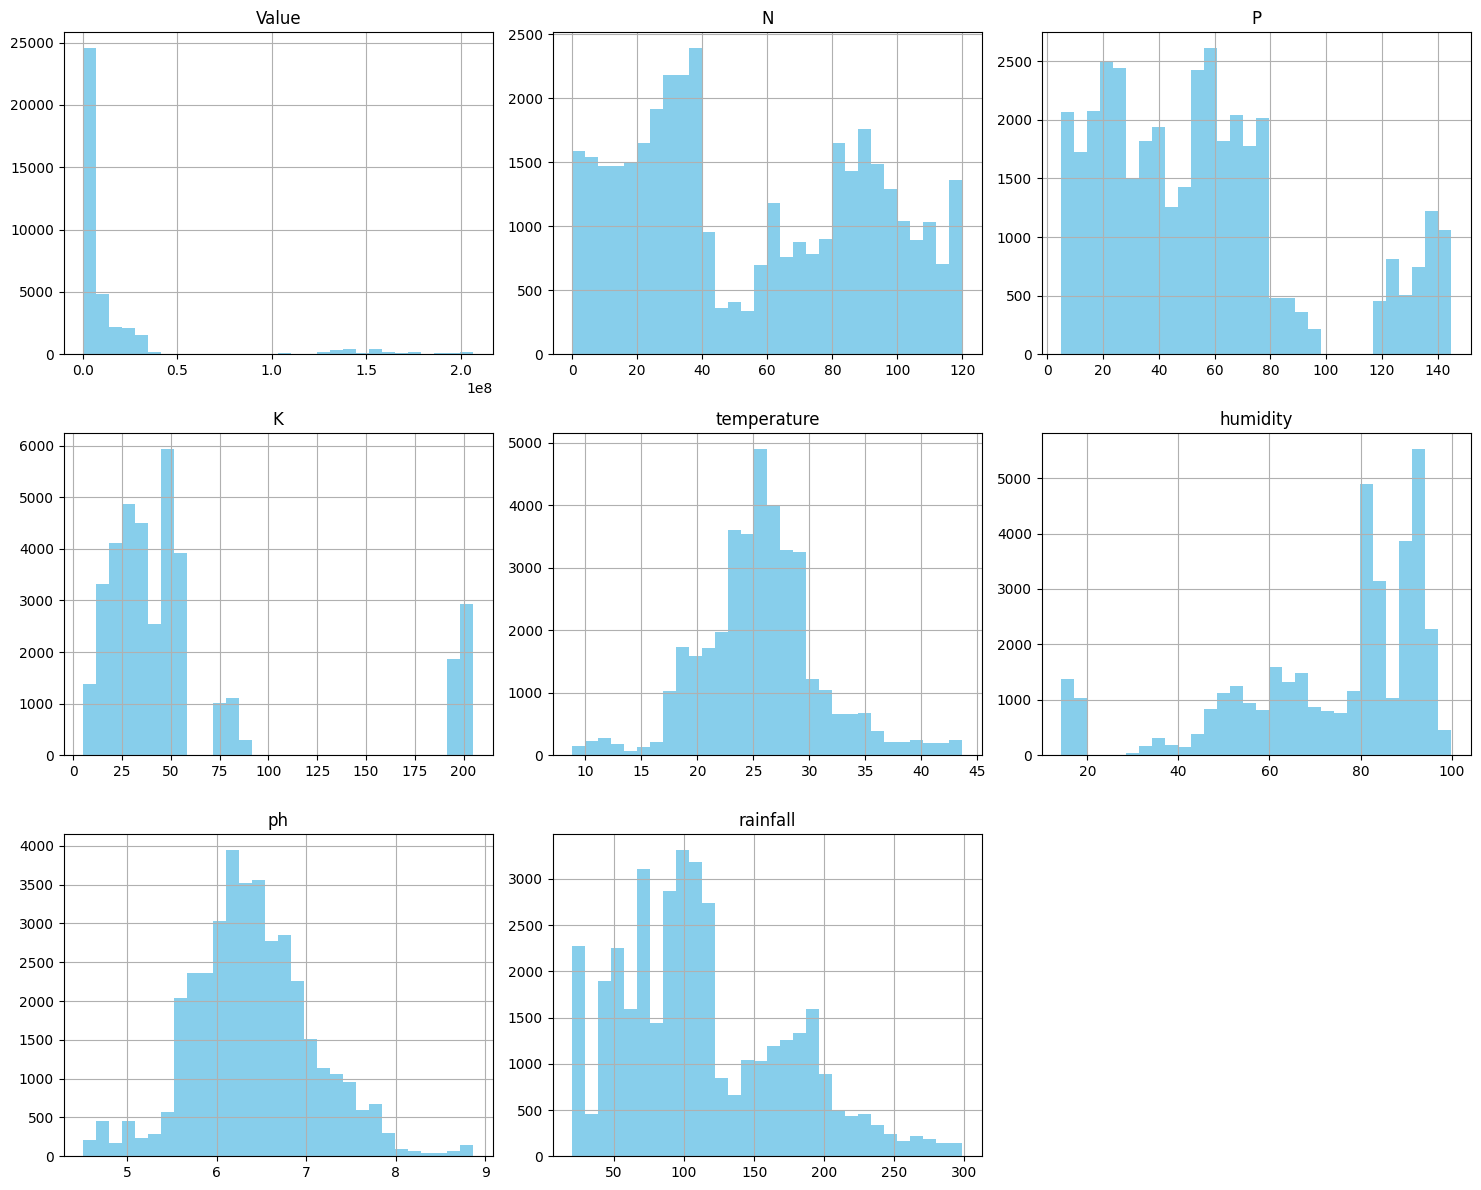

In [ ]:
import matplotlib.pyplot as plt

final_data.hist(figsize=(15,12), bins=30, color='skyblue')
plt.tight_layout()
plt.show()

## BOXPLOTS FOR OUTLIERS (Final_Data)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Boxplots BEFORE Outlier Removal

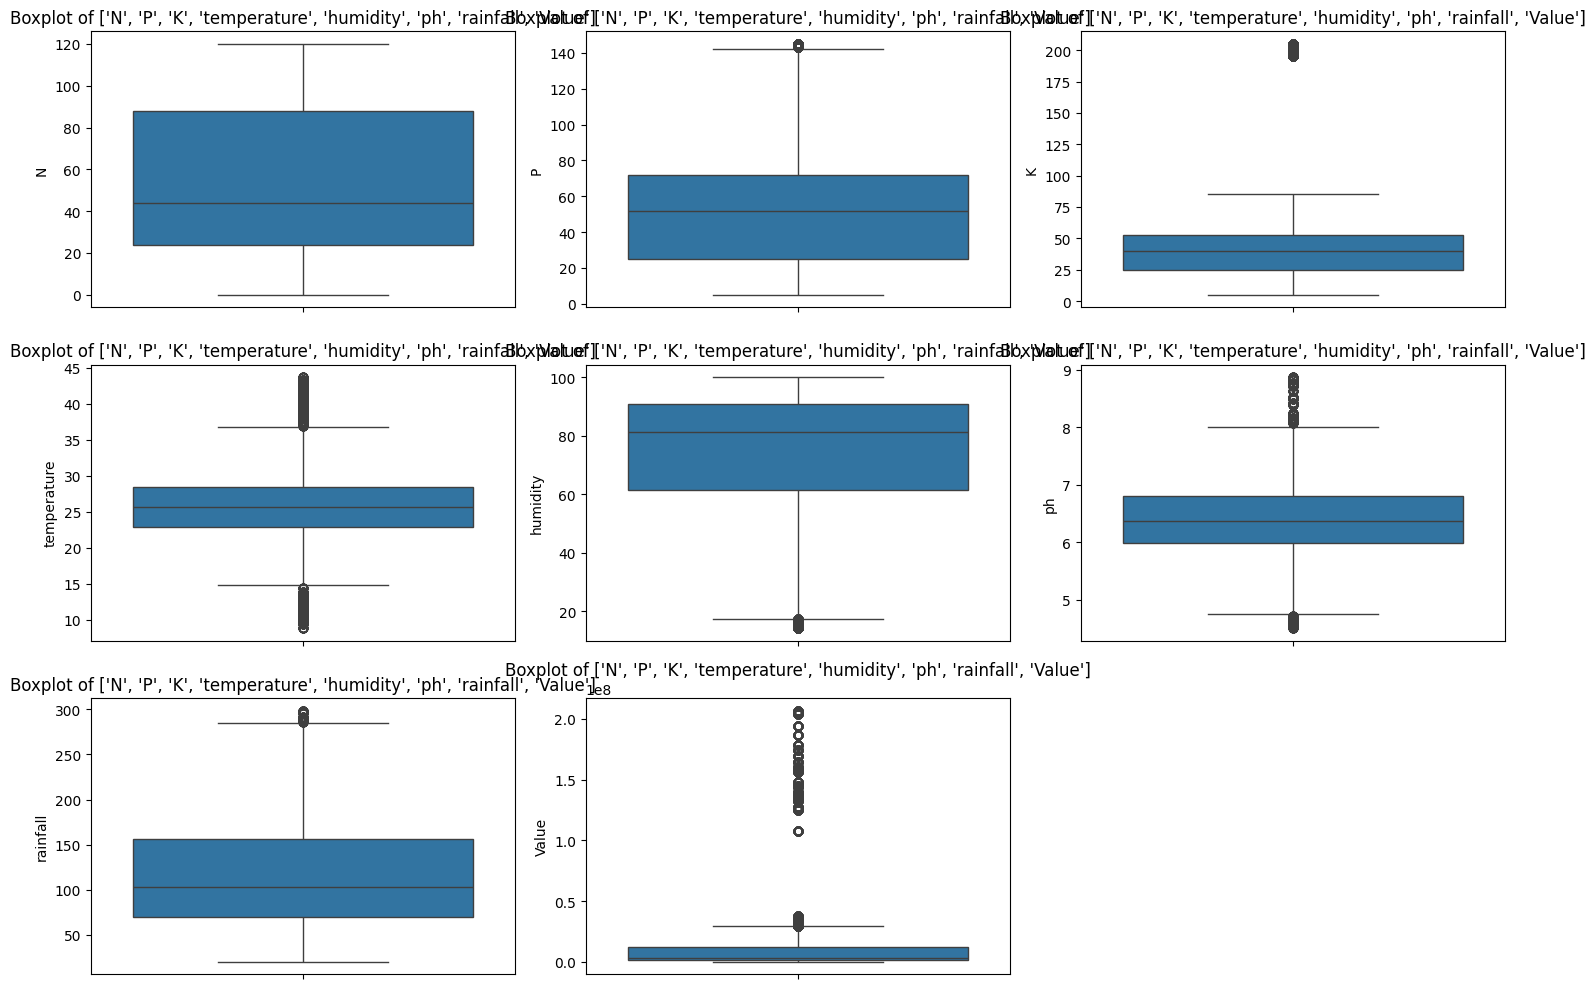

In [ ]:
plt.figure(figsize=(15,10))
numeric_cols = ['N','P','K','temperature','humidity','ph','rainfall','Value']

for i, col in enumerate(numeric_cols,1):
    plt.subplot(3,3,i)
    sns.boxplot(data=final_data, y=col)
    plt.title(f"Boxplot of {numeric_cols}")

plt.tight_layout()
plt.show()


### 2. Remove Outliers (IQR Method)

In [ ]:
numeric_cols = ['N','P','K','temperature','humidity','ph','rainfall','Value']

Q1 = final_data[numeric_cols].quantile(0.25)
Q3 = final_data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

final_clean = final_data[
    ~((final_data[numeric_cols] < (Q1 - 1.5 * IQR)) |
      (final_data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
]

print("Before:", final_data.shape)
print("After :", final_clean.shape)
print("Removed rows:", final_data.shape[0] - final_clean.shape[0])


Before: (37800, 10)
After : (25878, 10)
Removed rows: 11922


**Outliers were removed using the IQR method to improve data quality, which reduced dataset size but increased robustness.**

### 3. Boxplots AFTER Outlier Removal

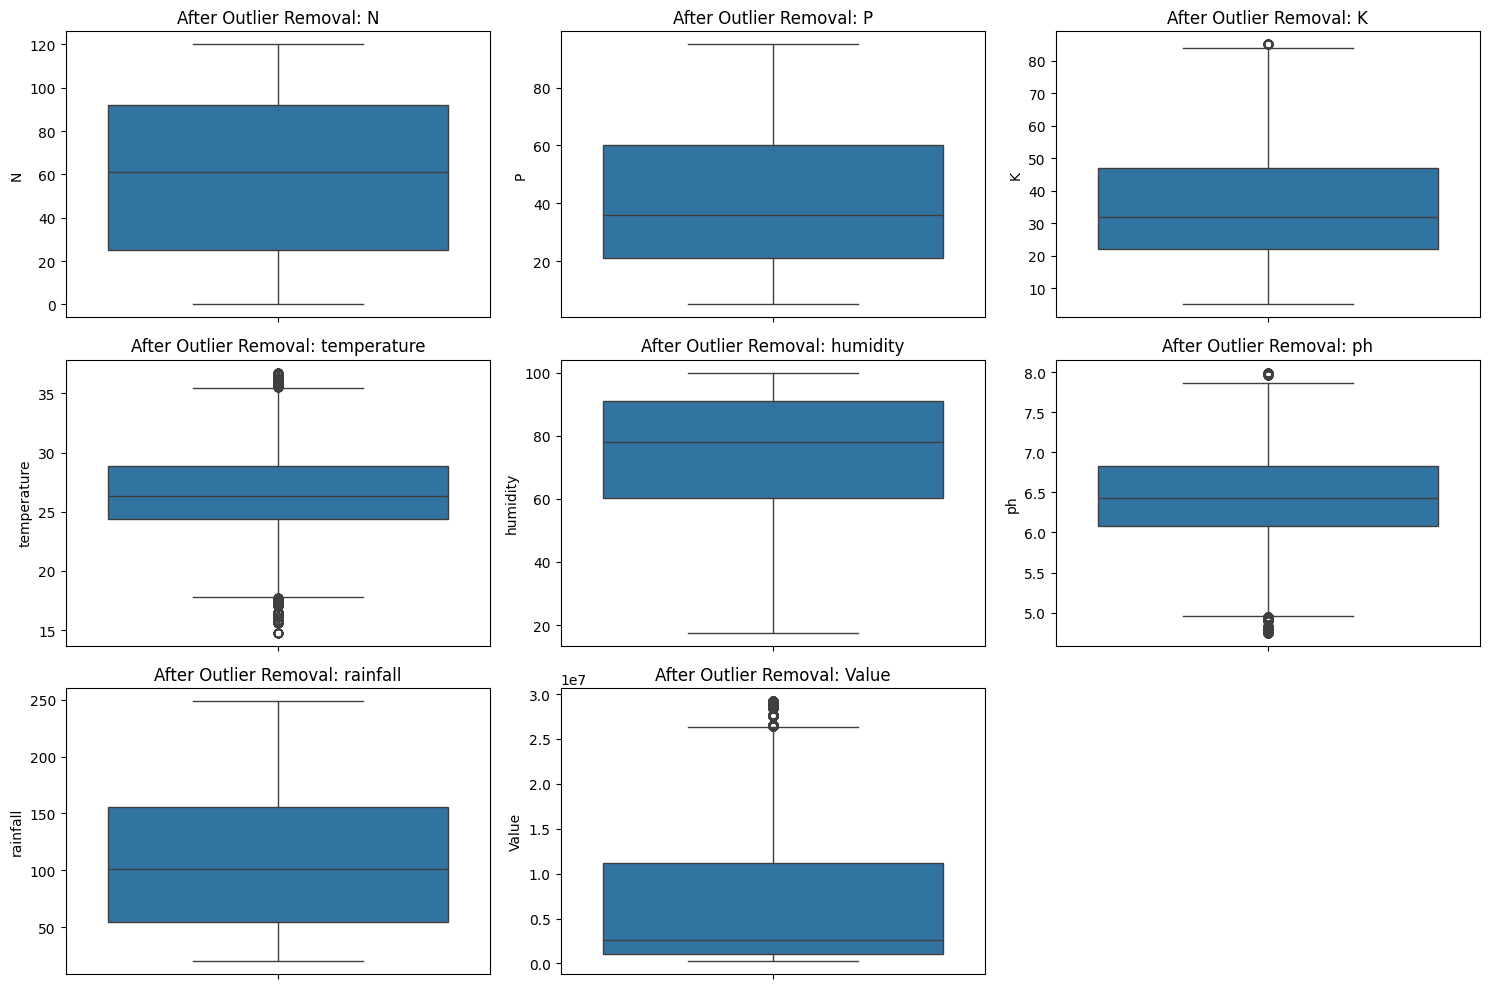

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols,1):
    plt.subplot(3,3,i)
    sns.boxplot(data=final_clean, y=col)
    plt.title(f"After Outlier Removal: {col}")

plt.tight_layout()
plt.show()

In [ ]:
final_clean

,Element,Value,N,P,K,temperature,humidity,ph,rainfall,label
2400,Production,14137300.0,91,94,46,29.367924,76.249001,6.149934,92.828409,banana
2401,Production,14137300.0,105,95,50,27.333690,83.676752,5.849076,101.049479,banana
2402,Production,14137300.0,108,92,53,27.400536,82.962213,6.276800,104.937800,banana
2403,Production,14137300.0,86,76,54,29.315908,80.115857,5.926825,90.109781,banana
2404,Production,14137300.0,80,77,49,26.054330,79.396545,5.519088,113.229737,banana
...,...,...,...,...,...,...,...,...,...,...
38395,Production,3626000.0,97,12,47,25.287846,89.636679,6.765095,58.286977,watermelon
38396,Production,3626000.0,110,7,45,26.638386,84.695469,6.189214,48.324286,watermelon
38397,Production,3626000.0,96,18,50,25.331045,84.305338,6.904242,41.532187,watermelon
38398,Production,3626000.0,83,23,55,26.897502,83.892415,6.463271,43.971937,watermelon


In [ ]:
final_clean['label'].unique()

array(['banana', 'cantaloupes and other melon', 'chick pea', 'coconut',
       'coffee', 'jute', 'lentil', 'maize (corn)', 'mangoe', 'orange',
       'papaya', 'pigeon pea', 'watermelon'], dtype=object)

In [ ]:
len(final_clean['label'].value_counts())

13

In [ ]:
final_clean.isnull().sum()

,0
Element,0
Value,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


**Missing crops check**

In [ ]:
before_crops = set(final_data['label'].unique())
after_crops = set(final_clean['label'].unique())

missing_crops = before_crops - after_crops

print("Crops BEFORE outlier removal:", sorted(before_crops))
print("\nCrops AFTER outlier removal:", sorted(after_crops))
print("\n❌ Crops REMOVED due to outlier handling:", sorted(missing_crops))

Crops BEFORE outlier removal: ['apple', 'banana', 'cantaloupes and other melon', 'chick pea', 'coconut', 'coffee', 'grape', 'jute', 'lentil', 'maize (corn)', 'mangoe', 'orange', 'papaya', 'pigeon pea', 'rice', 'watermelon']

Crops AFTER outlier removal: ['banana', 'cantaloupes and other melon', 'chick pea', 'coconut', 'coffee', 'jute', 'lentil', 'maize (corn)', 'mangoe', 'orange', 'papaya', 'pigeon pea', 'watermelon']

❌ Crops REMOVED due to outlier handling: ['apple', 'grape', 'rice']


**After applying row-wise IQR based outlier removal, crops like apple, grape, and rice were completely removed because their production values were extreme.**
**This highlights a limitation of row deletion for agricultural production data, where crop-wise variance is very high.**

**A better approach would be IQR-based capping instead of row deletion to preserve all crop categories.**

## Outlier Handling – CAPPING Method

1. A better approach would be IQR-based capping instead of row deletion to preserve all crop categories.
2. Data size same

In [ ]:
import numpy as np

numeric_cols = ['N','P','K','temperature','humidity','ph','rainfall','Value']

final_cap = final_data.copy()

for col in numeric_cols:
    Q1 = final_cap[col].quantile(0.25)
    Q3 = final_cap[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    final_cap[col] = np.where(final_cap[col] < lower, lower, final_cap[col])
    final_cap[col] = np.where(final_cap[col] > upper, upper, final_cap[col])

print("Shape Before capping:", final_data.shape)
print("Shape after capping:", final_cap.shape)

Shape Before capping: (37800, 10)
Shape after capping: (37800, 10)


**Outliers were handled using IQR-based capping to preserve data size while reducing the influence of extreme values.**

In [ ]:
final_cap.nunique()

,0
Element,1
Value,343
N,120
P,115
K,63
temperature,1511
humidity,1538
ph,1564
rainfall,1593
label,16


In [ ]:
len(final_cap['label'].value_counts())

16

In [ ]:
final_cap['label'].value_counts()

,count
label,
apple,2400
banana,2400
chick pea,2400
coconut,2400
jute,2400
grape,2400
mangoe,2400
lentil,2400
rice,2400


### 5. Null Value After Removal Of Outliers

In [ ]:
final_cap.isnull().sum()


,0
Element,0
Value,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


**Boxplots AFTER Outlier Removal Using Capping Method.**

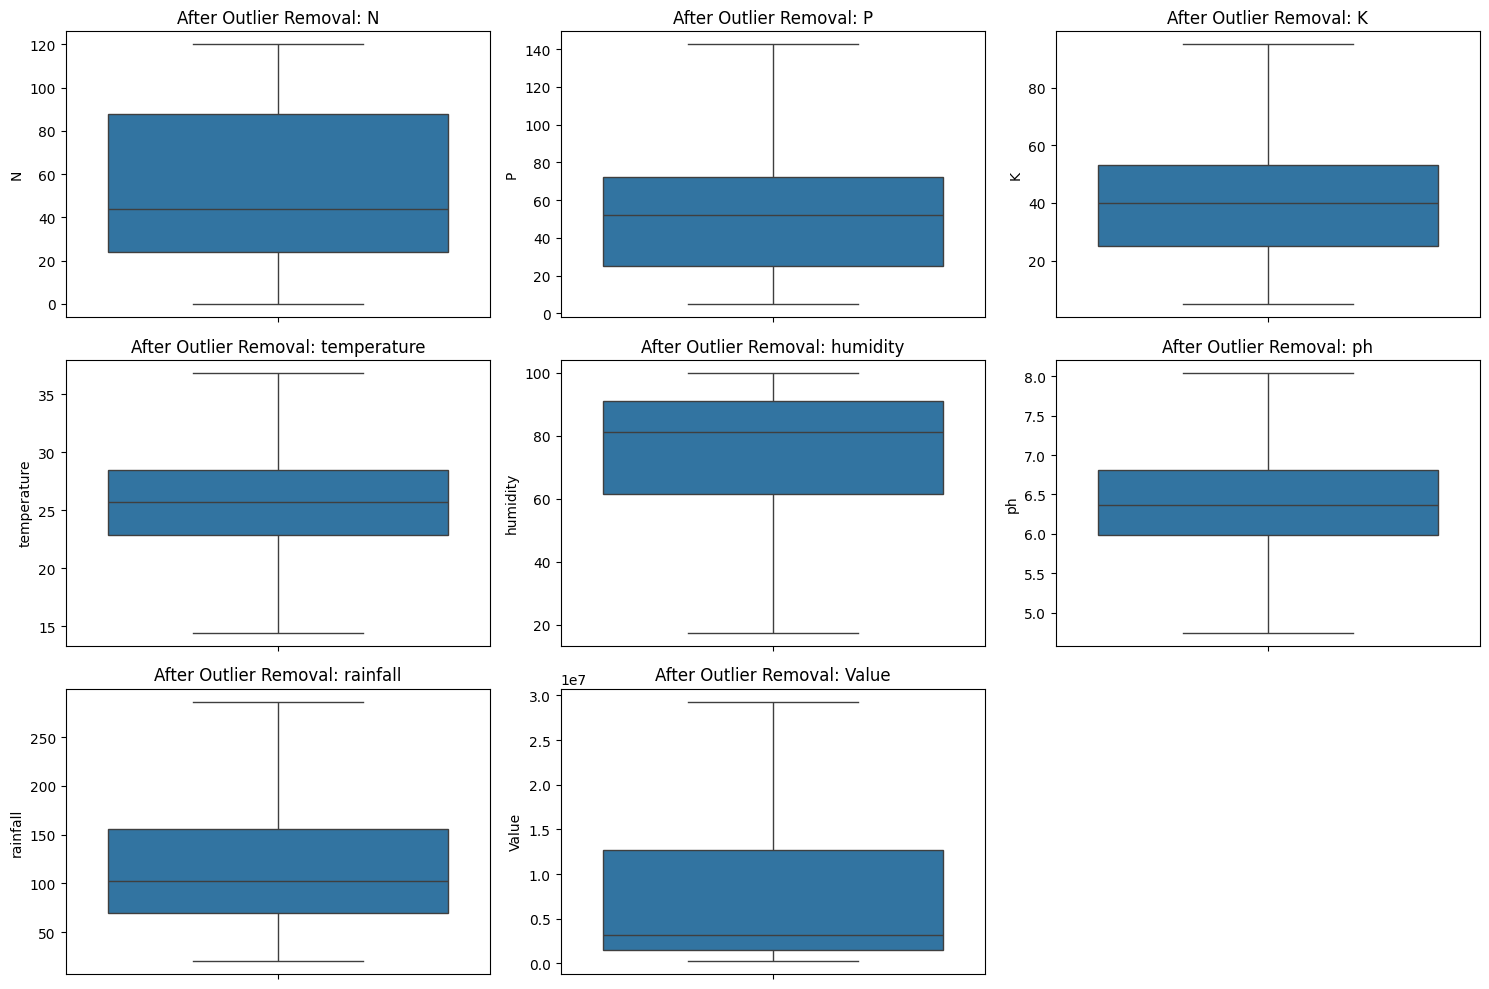

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols,1):
    plt.subplot(3,3,i)
    sns.boxplot(data=final_cap, y=col)
    plt.title(f"After Outlier Removal: {col}")

plt.tight_layout()
plt.show()

### 6. Correlation Heatmap

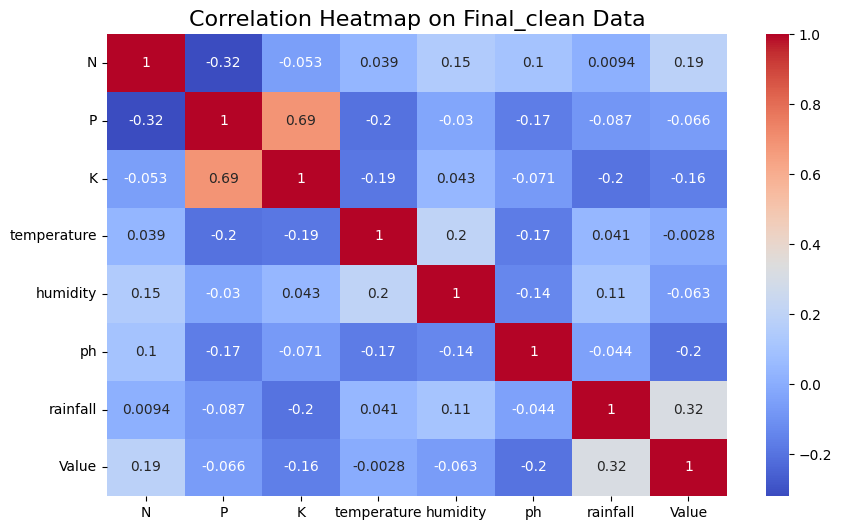

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(final_cap[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap on Final_clean Data", fontsize=16)
plt.show()

### 7. Pairplot (Limit to 400 rows for speed)

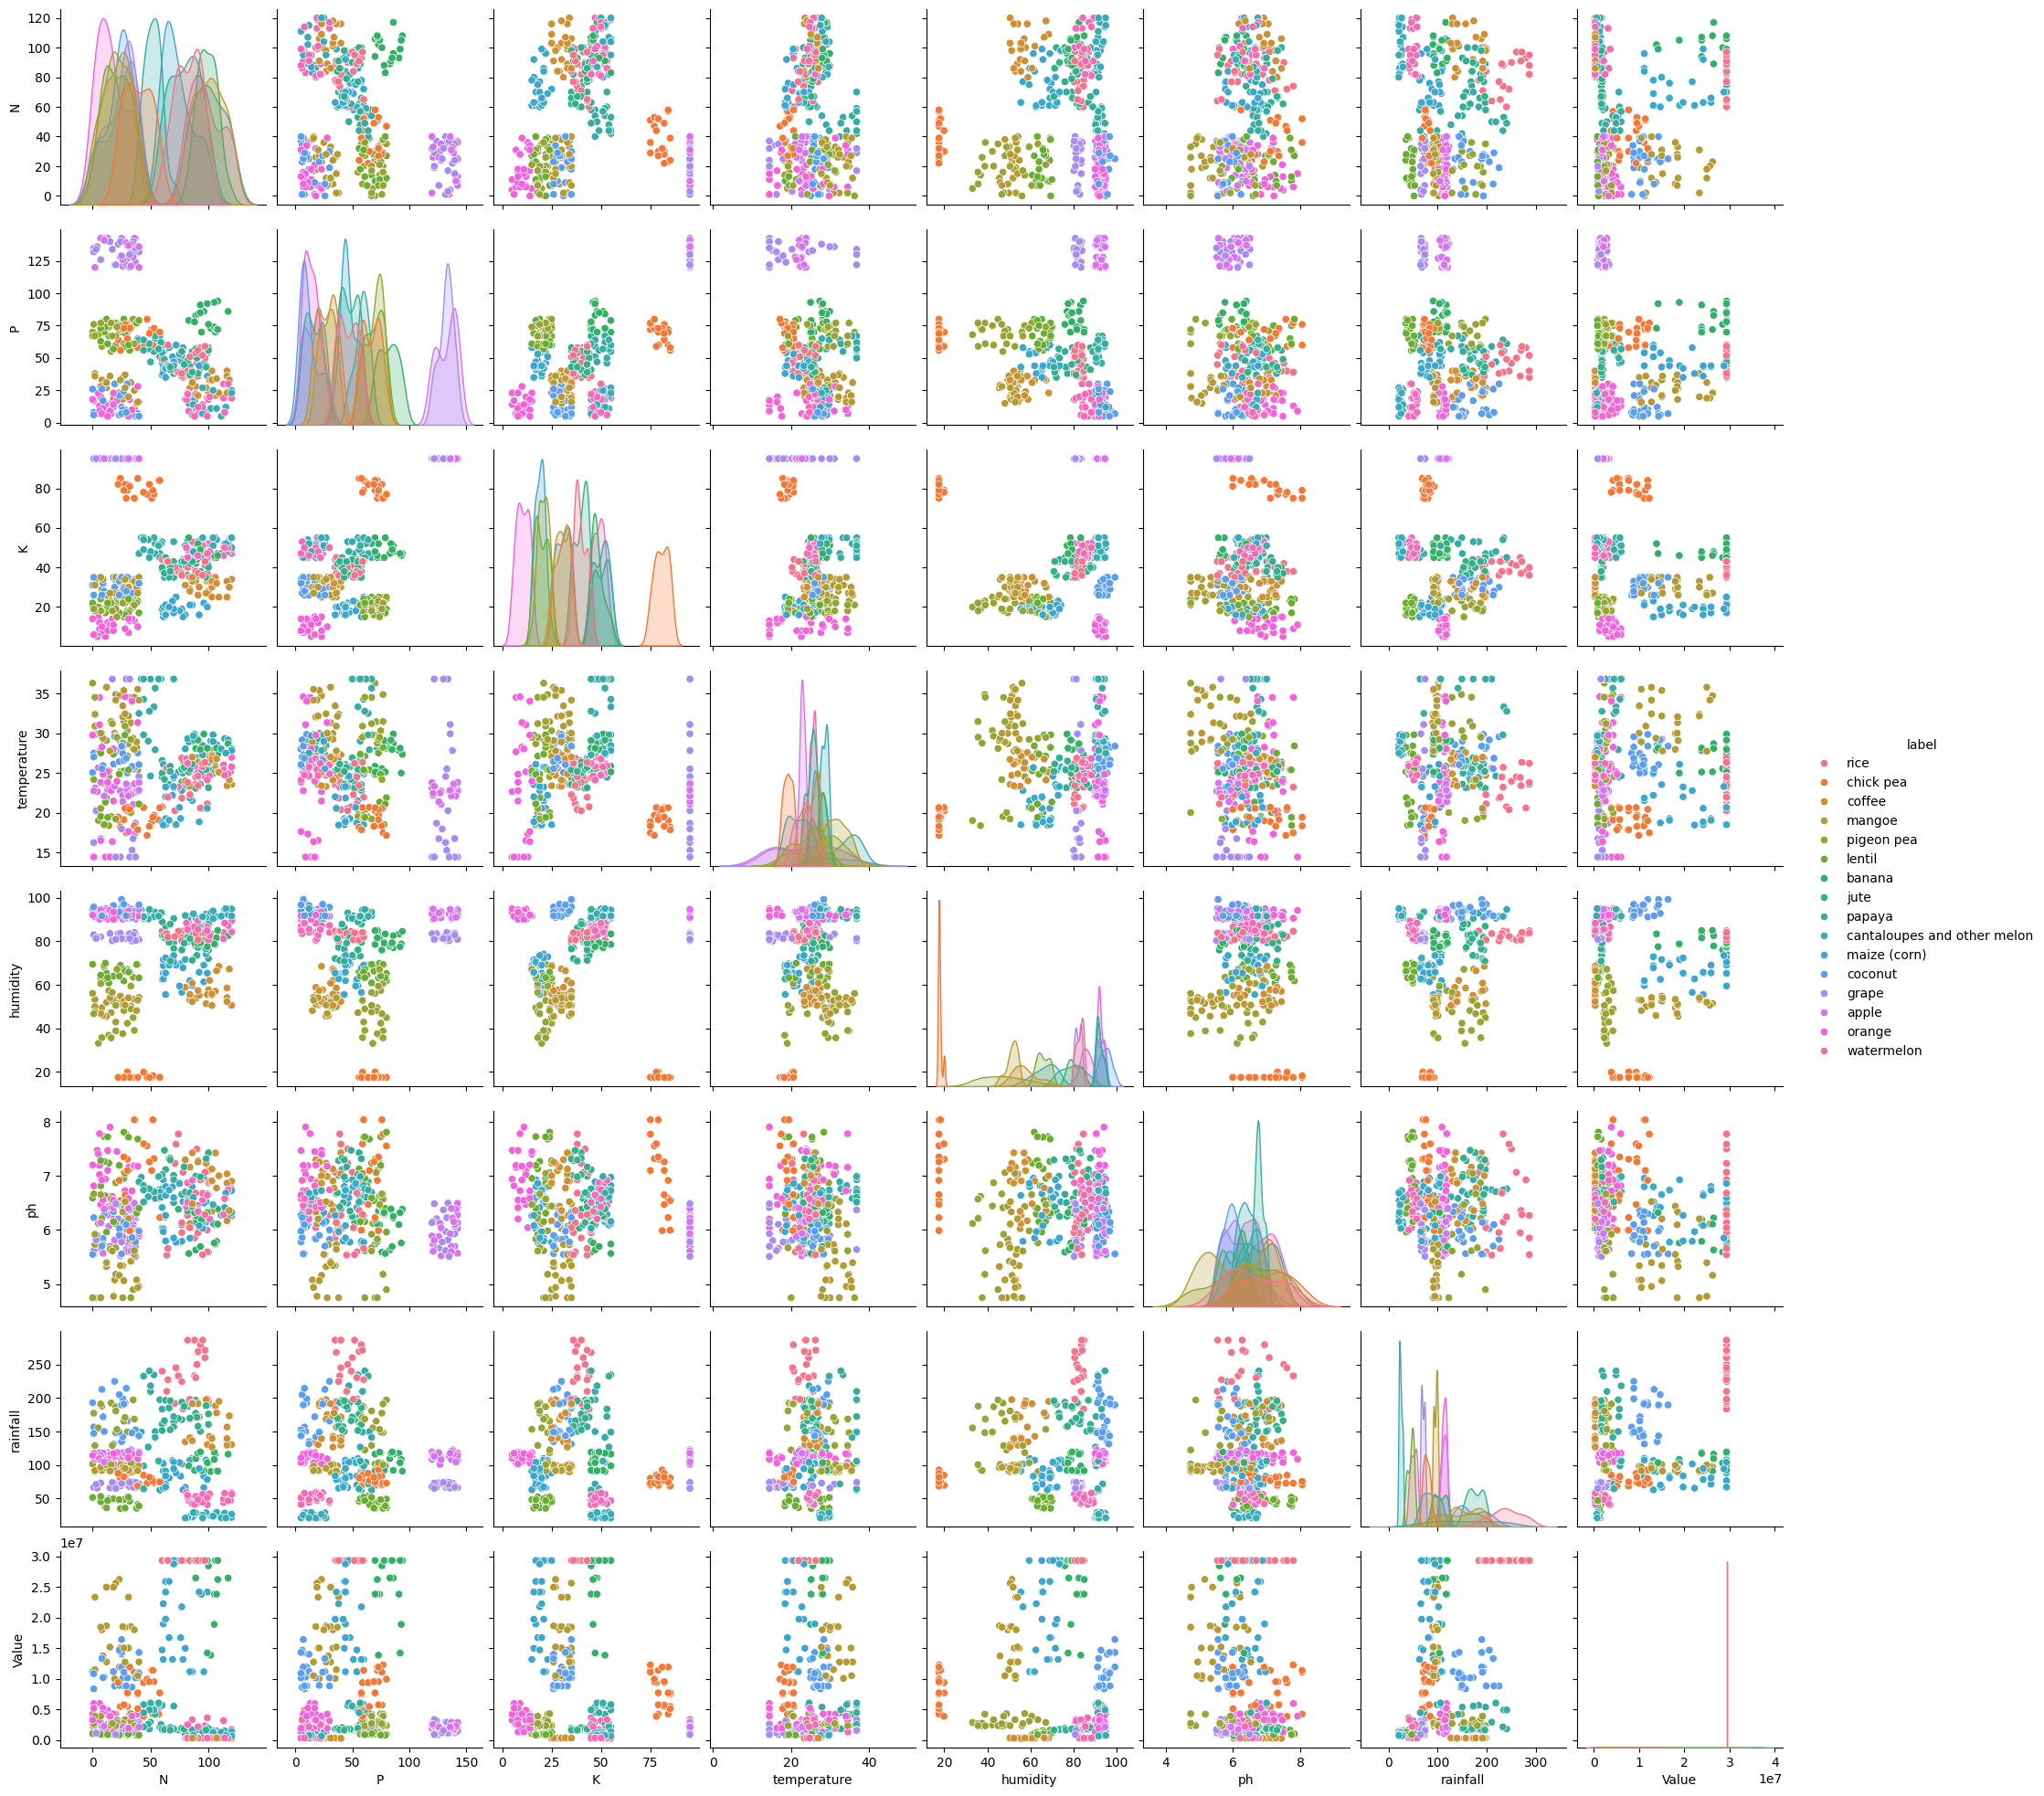

In [ ]:
sample = final_cap.sample(400)

sns.pairplot(sample,
             vars=['N','P','K','temperature','humidity','ph','rainfall','Value'],
             hue='label')
plt.show()

**In this project, pairplot was used during the exploratory data analysis phase to understand the relationship between soil nutrients (N, P, K), climatic variables (temperature, humidity, rainfall), and crop production value.**

# Milestone 3: Week 5 & 6 - Model Development & Evaluation(REGRESSION)

• Train multiple regression models (Random Forest, XGBoost, Linear Regression).

• Evaluate using RMSE, R2, MAE on test data.

• Use SHAP or feature importance to interpret models.

• Select best-performing model for integration.

**We experimented with both capping and removal methods. For final modeling, capping was preferred as it preserved data size while controlling extreme values.**

In [ ]:
final_cap

,Element,Value,N,P,K,temperature,humidity,ph,rainfall,label
0,Production,1050000.0,24.0,128.0,95.0,22.750888,90.694892,5.521467,110.431786,apple
1,Production,1050000.0,7.0,142.5,95.0,23.849401,94.348150,6.133221,114.051249,apple
2,Production,1050000.0,14.0,128.0,95.0,22.608010,94.589006,6.226290,116.039659,apple
3,Production,1050000.0,8.0,120.0,95.0,21.186674,91.134357,6.321152,122.233323,apple
4,Production,1050000.0,20.0,129.0,95.0,23.410447,91.699133,5.587906,116.077793,apple
...,...,...,...,...,...,...,...,...,...,...
38395,Production,3626000.0,97.0,12.0,47.0,25.287846,89.636679,6.765095,58.286977,watermelon
38396,Production,3626000.0,110.0,7.0,45.0,26.638386,84.695469,6.189214,48.324286,watermelon
38397,Production,3626000.0,96.0,18.0,50.0,25.331045,84.305338,6.904242,41.532187,watermelon
38398,Production,3626000.0,83.0,23.0,55.0,26.897502,83.892415,6.463271,43.971937,watermelon


In [ ]:
final_cap = final_cap.drop(columns=['Element'], errors='ignore')

## 1. Feature Engineering

**Feature scaling ensures all numeric variables are on the same scale and prevents dominance of high-magnitude features.**

In [ ]:
# Season Index
final_cap['season_index'] = final_cap['temperature'] * final_cap['humidity']

# Water Stress Index
final_cap['water_stress'] = final_cap['rainfall'] / final_cap['temperature']

Season Index → overall climatic suitability

Water Stress → rainfall availability relative to heat

## 2. Label Encoding (Categorical → Numeric)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
final_cap['label_encoded'] = le.fit_transform(final_cap['label'])

final_cap[['label', 'label_encoded']].head()

,label,label_encoded
0,apple,0
1,apple,0
2,apple,0
3,apple,0
4,apple,0


Crop name is a categorical variable; label encoding converts it into numerical form for regression models.

## 3. Feature Scaling (ONLY Numeric Columns)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = [
    'N','P','K','temperature','humidity','ph','rainfall',
    'season_index','water_stress'
]

final_cap[num_cols] = scaler.fit_transform(final_cap[num_cols])

final_cap[num_cols].head()

,N,P,K,temperature,humidity,ph,rainfall,season_index,water_stress
0,-0.850084,1.966651,1.98427,-0.599257,0.811239,-1.324302,-0.053559,0.231081,0.117913
1,-1.324058,2.359333,1.98427,-0.373019,0.983725,-0.401833,0.007411,0.507635,0.088620
2,-1.128892,1.966651,1.98427,-0.628683,0.995096,-0.261493,0.040906,0.342261,0.231609
3,-1.296177,1.750000,1.98427,-0.921406,0.831988,-0.118449,0.145238,0.034790,0.491318
4,-0.961607,1.993733,1.98427,-0.463421,0.858654,-1.224118,0.041548,0.354475,0.160508


Feature scaling ensures all numerical features contribute equally to model learning.

## 4. Separate Features (X) and Target (y)

In [ ]:
X = final_cap.drop(columns=['Value', 'label'])
y = final_cap['Value']

X.shape, y.shape

((37800, 10), (37800,))

Target (y) → Crop production (Value)

Features (X) → Soil nutrients, weather, engineered features, crop type

## 5. Train–Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)
X_train.shape, X_test.shape

((30240, 10), (7560, 10))

**The dataset is split into 80% training data and 20% testing data to evaluate model performance on unseen data.**

## 6. Linear Regression (Baseline Model)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression")
print("R2:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression
R2: 0.23537074264170132
MAE: 6570739.772264363
RMSE: 8457274.815109594


Linear Regression is used as a baseline model

It captures linear relationships

Performance is usually lower for complex agricultural data

## 7. Random Forest Regression (Main Model)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
print("Random Forest Performance")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest Performance
R2 Score: 0.9156563562164127
MAE: 1575714.663771106
RMSE: 2808866.9420807227


Random Forest handles non-linear relationships

Robust to noise and feature interactions

Performs better for real-world agricultural datasets

## 8. Train vs Test Performance Check

In [ ]:
print("Train R2:", rf.score(X_train, y_train))
print("Test R2 :", rf.score(X_test, y_test))

Train R2: 0.918294852199523
Test R2 : 0.9156563562164127


Similar train and test scores → no overfitting

Large gap → overfitting

Very low both → underfitting

## 9. Feature Importance(Explain Model)

In [ ]:
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


,0
water_stress,0.432473
N,0.218392
label_encoded,0.189352
P,0.049430
humidity,0.039355
season_index,0.037259
rainfall,0.021636
ph,0.004950
K,0.003703
temperature,0.003451


**Feature importance analysis shows that rainfall, NPK values, season index, and crop type significantly influence crop production.**

## 10. Model Comparison (Final Decision)

In [ ]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R2": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_rf)
    ]
})

results

,Model,R2,RMSE,MAE
0,Linear Regression,0.235371,8.457275e+06,6.570740e+06
1,Random Forest,0.915656,2.808867e+06,1.575715e+06


Random Forest was selected due to higher R² and lower error metrics.

## 11. Final Model Selection

**After comparing Linear Regression and Random Forest Regression models,
Random Forest Regression was selected as the final model due to:**

• Highest R² score (≈ 0.91)

• Lower RMSE and MAE

• Ability to capture non-linear relationships

• Robust performance on unseen test data

**This model is chosen for crop production prediction.**


# SAVE MODEL FOR DEPLOYMENT READY

In [ ]:
import joblib

joblib.dump(rf, "final_random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")

print("Model & preprocessors saved successfully!")

Model & preprocessors saved successfully!


# **FINAL DATA + MODEL FLOW DIAGRAM**

**ML Pipeline**

Raw Data (FAO + Crop Dataset)

        ↓
Data Cleaning & Merging

        ↓
EDA & Outlier Handling

        ↓
Feature Engineering

        ↓
Label Encoding & Scaling

        ↓
Train–Test Split

        ↓
Model Training (Random Forest)

        ↓
Model Evaluation & Selection


# **Milestone 4: Week 7 & 8 - UI, Integration & Deployment**

• Create a simple web UI for input (tabular or form).

• Show predicted yield with confidence intervals.

• Perform real-time testing and validation.

• Final documentation, deployment, and presentation.

## Load Saved Model & Preprocessors

In [ ]:
import joblib

model = joblib.load("final_random_forest_model.pkl")
scaler = joblib.load("scaler.pkl")
le = joblib.load("label_encoder.pkl")

print("Model, scaler & encoder loaded successfully")


Model, scaler & encoder loaded successfully


## Define User Input

In [ ]:
import pandas as pd

user_input = {
    "N": 90,
    "P": 40,
    "K": 40,
    "temperature": 25,
    "humidity": 80,
    "ph": 6.5,
    "rainfall": 120
}

User provides soil nutrients and weather conditions for prediction.

## Convert User Input to DataFrame

In [ ]:
import pandas as pd

user_df = pd.DataFrame([user_input])
user_df

,N,P,K,temperature,humidity,ph,rainfall
0,90,40,40,25,80,6.5,120


## Feature Engineering on User Input

In [ ]:
# Season Index
user_df['season_index'] = user_df['temperature'] * user_df['humidity']

# Water Stress Index
user_df['water_stress'] = user_df['rainfall'] / user_df['temperature']


Feature engineering must be identical for both training and inference to avoid data leakage.

## Predict Production for EACH Crop


In [ ]:
results = []

for crop in le.classes_:
    temp_df = user_df.copy()

    # Encode crop
    temp_df['label_encoded'] = le.transform([crop])[0]
    X_input = temp_df[
        ['N','P','K','temperature','humidity','ph','rainfall',
         'season_index','water_stress','label_encoded']
    ]

    # Scale numeric columns
    num_cols = ['N','P','K','temperature','humidity','ph','rainfall',
                'season_index','water_stress']
    X_input[num_cols] = scaler.transform(X_input[num_cols])

    # MODEL is now defined
    prediction = model.predict(X_input)[0]
    results.append({
        'Crop': crop,
        'Predicted_Production': prediction
    })

Production is predicted separately for each crop using the same environmental conditions.

## Create Prediction DataFrame

In [ ]:
pred_df = pd.DataFrame(results)
pred_df

,Crop,Predicted_Production
0,apple,1.561684e+06
1,banana,1.014208e+07
2,cantaloupes and other melon,1.014208e+07
3,chick pea,6.954314e+06
4,coconut,7.057833e+06
5,coffee,1.082270e+06
6,grape,1.082270e+06
7,jute,1.808527e+06
8,lentil,1.808527e+06
9,maize (corn),1.808527e+06


## Select Top 5 Crops by Production

In [ ]:
pred_df = pd.DataFrame(results)

top5 = pred_df.sort_values(
    by='Predicted_Production',
    ascending=False
).head(5)

top5


,Crop,Predicted_Production
15,watermelon,2.931980e+07
14,rice,2.931980e+07
1,banana,1.014208e+07
2,cantaloupes and other melon,1.014208e+07
4,coconut,7.057833e+06


Crops are ranked based on predicted production, and the top 5 are selected.

## Plot Graph (Top 5 Crops)

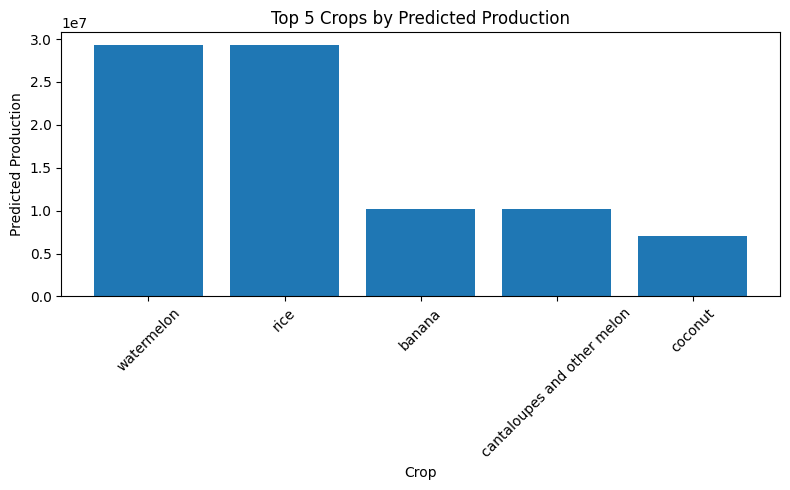

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5['Crop'], top5['Predicted_Production'])
plt.xlabel("Crop")
plt.ylabel("Predicted Production")
plt.title("Top 5 Crops by Predicted Production")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A bar graph is used to visually compare predicted production across the top crops.

## **User inputs soil and weather data → features are engineered → production is predicted for each crop → top 5 crops are selected → results are visualized using a bar graph.**